Week 3 of Capstone Project - Part I

In [1]:
# Import necessary libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

print('Libraries imported.')

Libraries imported.


In [2]:
# scrape the website https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,

list = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")




In [3]:
# define the dataframe columns
column_names = ['Postalcode', 'Borough', 'Neighborhood'] 

# instantiate the dataframe
df = pd.DataFrame(columns=column_names)

#looking at DF
df

,Postalcode,Borough,Neighborhood


In [4]:
df.shape

(0, 3)

In [5]:
df.dtypes

Postalcode      object
Borough         object
Neighborhood    object
dtype: object

Assign the list to a dataframe

In [6]:
df = pd.DataFrame(list[0])
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [7]:
df.shape

(287, 3)

Looking at the summary of what we scraped of website

In [8]:
df.describe()

,Postcode,Borough,Neighbourhood
count,287,287,287
unique,180,11,209
top,M9V,Not assigned,Not assigned
freq,8,77,77


Drop all the rows with a Borough of "Not assigned"

In [9]:
df.drop(df[df["Borough"] == "Not assigned"].index, axis=0, inplace=True)

In [10]:
df.shape


(210, 3)

Now replacing those Neighborhoods that have an "Not assigned" with the name of the Borough

In [11]:
df['Neighbourhood']=df['Neighbourhood'].replace("Not assigned", df['Borough']) 

In [12]:
df.describe()

,Postcode,Borough,Neighbourhood
count,210,210,210
unique,103,10,208
top,M8Y,Etobicoke,Runnymede
freq,8,45,2


In [13]:
df.shape

(210, 3)

In [14]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


Group by Postcode and Borough and aggregate the multiple Neighborhoods into one field 

In [15]:
dfclean = df.groupby(by=['Postcode','Borough']).agg(lambda x: ','.join(x))

dfclean.reset_index(level=['Postcode','Borough'], inplace=True) 

dfclean.shape

(103, 3)

In [16]:
dfclean.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [17]:
dfclean.shape

(103, 3)

End of week 3 Part 1

Beginning of Part 2 - getting the coordinates

In [18]:

#!conda install -c conda-forge geocoder
#import geocoder # import geocoder



In [19]:
# Gave up after hanging even for just one locaton and decided to read CSV file instead 

#def get_coords(postalcode):
#     # initialize your variable to None
#     lat_lng_coords = None
#     # loop until you get the coordinates
#     while(lat_lng_coords is None):
#       g = geocoder.google('{}, Toronto, Ontario'.format(postalcode))
#       lat_lng_coords = g.latlng
#     latitude = lat_lng_coords[0]
#     longitude = lat_lng_coords[1]
#     return latitude,longitude

In [20]:
#for i in range(0,len(dfclean)):
#    dfclean['Latitude'][i],dfclean['Longitude'][i]=get_coords(dfclean.iloc[i]['Postcode'])

# dfclean['Latitude'][0],dfclean['Longitude'][0]=get_coords(dfclean.iloc[0]['Postcode'])

In [21]:
filename = "http://cocl.us/Geospatial_data"

#reading file info dataframe
df_co = pd.read_csv(filename) 

In [22]:
# see what was loaded
df_co.dtypes

Postal Code     object
Latitude       float64
Longitude      float64
dtype: object

In [23]:
df_co.shape

(103, 3)

In [24]:
#sort both files , though not sure that was actually needed
df_co_s = df_co.sort_values('Postal Code',ascending=True)
dfclean_s = dfclean.sort_values('Postcode', ascending = True)
dfclean.head()


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [25]:
#merge both files on index Postal Code and Postcode

df_final = pd.merge(dfclean_s, df_co_s, how='inner', on=None, left_on= 'Postcode', right_on='Postal Code',
         left_index=True)

In [26]:
df_final.head(10)

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",M1K,43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",M1L,43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",M1M,43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",M1N,43.692657,-79.264848


In [27]:
# Drop column "Postal code" since not needed twice

df_final.drop(columns='Postal Code')

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


END of week 3 Part 2





BEGINNING of Week 3 Part 3 -


In [53]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages

In [56]:
# clean file retaining only  Boroughs with the word Toronto

df_tor = df_final[df_final.Borough.str.contains("Toronto") == True]
df_tor.reset_index(inplace=True)

df_tor.shape

(39, 7)

In [57]:
df_tor

,index,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,37,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031
1,41,M4K,East Toronto,"The Danforth West,Riverdale",M4K,43.679557,-79.352188
2,42,M4L,East Toronto,"The Beaches West,India Bazaar",M4L,43.668999,-79.315572
3,43,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923
4,44,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790
5,45,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197
6,46,M4R,Central Toronto,North Toronto West,M4R,43.715383,-79.405678
7,47,M4S,Central Toronto,Davisville,M4S,43.704324,-79.388790
8,48,M4T,Central Toronto,"Moore Park,Summerhill East",M4T,43.689574,-79.383160
9,49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",M4V,43.686412,-79.400049


In [58]:
#Set up credentials for FourSquare

CLIENT_ID = '5M01F5XNU45N1FR3TFUATU33FX1FLCCDWGGN22NBQ50CYEIF' # your Foursquare ID
CLIENT_SECRET = 'G4UJGAXKC24ZM1DA4GUNLIZVYYYAVJRVDVKZU2ZFHLDMT3S1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5M01F5XNU45N1FR3TFUATU33FX1FLCCDWGGN22NBQ50CYEIF
CLIENT_SECRET:G4UJGAXKC24ZM1DA4GUNLIZVYYYAVJRVDVKZU2ZFHLDMT3S1


In [59]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [60]:
def getNearbyVenues(names, borough, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, borough, lat, lng in zip(names, borough, latitudes, longitudes):
        print(name, borough)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            borough,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Borough',           
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)
    

In [61]:
LIMIT = 100

toronto_venues = getNearbyVenues(names=df_tor['Postcode'],
                                 borough=df_tor['Borough'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude']
                                  )


M4E East Toronto
M4K East Toronto
M4L East Toronto
M4M East Toronto
M4N Central Toronto
M4P Central Toronto
M4R Central Toronto
M4S Central Toronto
M4T Central Toronto
M4V Central Toronto
M4W Downtown Toronto
M4X Downtown Toronto
M4Y Downtown Toronto
M5A Downtown Toronto
M5B Downtown Toronto
M5C Downtown Toronto
M5E Downtown Toronto
M5G Downtown Toronto
M5H Downtown Toronto
M5J Downtown Toronto
M5K Downtown Toronto
M5L Downtown Toronto
M5N Central Toronto
M5P Central Toronto
M5R Central Toronto
M5S Downtown Toronto
M5T Downtown Toronto
M5V Downtown Toronto
M5W Downtown Toronto
M5X Downtown Toronto
M6G Downtown Toronto
M6H West Toronto
M6J West Toronto
M6K West Toronto
M6P West Toronto
M6R West Toronto
M6S West Toronto
M7A Downtown Toronto
M7Y East Toronto


In [62]:
print(toronto_venues.shape)
toronto_venues.head()

(3764, 8)


,Postcode,Borough,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,East Toronto,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,M4E,East Toronto,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
2,M4E,East Toronto,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
3,M4E,East Toronto,43.676357,-79.293031,Tori's Bakeshop,43.672114,-79.290331,Vegetarian / Vegan Restaurant
4,M4E,East Toronto,43.676357,-79.293031,Ed's Real Scoop,43.672630,-79.287993,Ice Cream Shop


In [63]:
toronto_venues.groupby('Postcode').count()

,Borough,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,,
M4E,100,100,100,100,100,100,100
M4K,91,91,91,91,91,91,91
M4L,100,100,100,100,100,100,100
M4M,100,100,100,100,100,100,100
M4N,65,65,65,65,65,65,65
M4P,100,100,100,100,100,100,100
M4R,100,100,100,100,100,100,100
M4S,100,100,100,100,100,100,100
M4T,78,78,78,78,78,78,78


In [64]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 275 uniques categories.


This is a lot less (+-50) categories than NYC

In [65]:
# Analyze Postcode
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot
# add neighborhood column back to dataframe
toronto_onehot['Postcode'] = toronto_venues['Postcode'] 
toronto_onehot.head()
# move Postcode column to the first column
pc = df['Postcode']
toronto_onehot.drop(labels=['Postcode'], axis=1,inplace = True)
toronto_onehot.insert(0, 'Postcode', pc)
toronto_onehot.head()

,Postcode,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
toronto_onehot.shape

(3764, 276)

In [67]:
toronto_grouped = toronto_onehot.groupby('Postcode').mean().reset_index()
toronto_grouped

,Postcode,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,M1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,

In [68]:
num_top_venues = 5

for hood in toronto_grouped['Postcode']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M1B----
                  venue  freq
0     French Restaurant   0.5
1           Coffee Shop   0.5
2          Nudist Beach   0.0
3  Pakistani Restaurant   0.0
4  Other Great Outdoors   0.0


----M1C----
                       venue  freq
0               Skating Rink  0.33
1               Liquor Store  0.33
2  Middle Eastern Restaurant  0.33
3          Afghan Restaurant  0.00
4               Nudist Beach  0.00


----M1E----
                  venue  freq
0  Caribbean Restaurant  0.33
1              Tea Room  0.33
2        Breakfast Spot  0.33
3  Other Great Outdoors  0.00
4       Organic Grocery  0.00


----M1G----
                  venue  freq
0        Sandwich Place   1.0
1     Afghan Restaurant   0.0
2          Nudist Beach   0.0
3  Pakistani Restaurant   0.0
4  Other Great Outdoors   0.0


----M1H----
                  venue  freq
0             Bookstore   1.0
1     Afghan Restaurant   0.0
2             Nightclub   0.0
3  Other Great Outdoors   0.0
4       Organic Grocery   0.0






----M4M----
                  venue  freq
0      Greek Restaurant   1.0
1          Noodle House   0.0
2  Pakistani Restaurant   0.0
3  Other Great Outdoors   0.0
4       Organic Grocery   0.0


----M4N----
                  venue  freq
0            Donut Shop   1.0
1     Afghan Restaurant   0.0
2          Nudist Beach   0.0
3  Pakistani Restaurant   0.0
4  Other Great Outdoors   0.0


----M4P----
                  venue  freq
0  Other Great Outdoors   1.0
1     Afghan Restaurant   0.0
2          Noodle House   0.0
3  Pakistani Restaurant   0.0
4       Organic Grocery   0.0


----M4R----
                  venue  freq
0                   Pub   1.0
1          Noodle House   0.0
2  Pakistani Restaurant   0.0
3  Other Great Outdoors   0.0
4       Organic Grocery   0.0


----M4S----
                  venue  freq
0                  Café   1.0
1     Afghan Restaurant   0.0
2          Noodle House   0.0
3  Pakistani Restaurant   0.0
4  Other Great Outdoors   0.0


----M4T----
                

                  venue  freq
0            Bagel Shop   1.0
1     Afghan Restaurant   0.0
2                  Park   0.0
3  Pakistani Restaurant   0.0
4  Other Great Outdoors   0.0


----M7R----
                  venue  freq
0     Fish & Chips Shop   1.0
1          Noodle House   0.0
2  Pakistani Restaurant   0.0
3  Other Great Outdoors   0.0
4       Organic Grocery   0.0


----M7Y----
                  venue  freq
0              Pharmacy   1.0
1     Afghan Restaurant   0.0
2          Noodle House   0.0
3  Other Great Outdoors   0.0
4       Organic Grocery   0.0


----M8V----
                           venue  freq
0                         Bakery  0.33
1                           Park  0.33
2                    Coffee Shop  0.33
3          Performing Arts Venue  0.00
4  Paper / Office Supplies Store  0.00


----M8W----
                   venue  freq
0             Skate Park   0.5
1  Portuguese Restaurant   0.5
2           Noodle House   0.0
3   Pakistani Restaurant   0.0
4   Other Great

In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Postcode_venues_sorted = pd.DataFrame(columns=columns)
Postcode_venues_sorted['Postcode'] = toronto_grouped['Postcode']

for ind in np.arange(toronto_grouped.shape[0]):
    Postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

Postcode_venues_sorted.head()

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,French Restaurant,Coffee Shop,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
1,M1C,Middle Eastern Restaurant,Skating Rink,Liquor Store,Zoo,Fast Food Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
2,M1E,Breakfast Spot,Caribbean Restaurant,Tea Room,Field,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Ethiopian Restaurant
3,M1G,Sandwich Place,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
4,M1H,Bookstore,Zoo,Filipino Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop


Cluster Postcodes

In [73]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Postcode', 1) 

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 0, 0, 1, 0, 0, 0, 2], dtype=int32)

In [74]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
Postcode_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_tor

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(Postcode_venues_sorted.set_index('Postcode'), on='Postcode')

toronto_merged # check the last columns!

,index,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,37,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031,3,Coffee Shop,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
1,41,M4K,East Toronto,"The Danforth West,Riverdale",M4K,43.679557,-79.352188,3,Clothing Store,Coffee Shop,Zoo,Egyptian Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
2,42,M4L,East Toronto,"The Beaches West,India Bazaar",M4L,43.668999,-79.315572,0,Italian Restaurant,Ice Cream Shop,Zoo,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
3,43,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923,0,Greek Restaurant,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
4,44,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790,0,Donut Shop,Zoo,Field,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Electronics Store
5,45,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197,0,Other Great Outdoors,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Food Court
6,46,M4R,Central Toronto,North Toronto West,M4R,43.715383,-79.405678,1,Pub,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Food Court
7,47,M4S,Central Toronto,Davisville,M4S,43.704324,-79.388790,0,Café,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Zoo,Food Court
8,48,M4T,Central Toronto,"Moore Park,Summerhill East",M4T,43.689574,-79.383160,2,Park,Indian Restaurant,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
9,49,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",M4V,43.686412,-79.400049,0,Sushi Restaurant,Indian Restaurant,Liquor Store,Pizza Place,Egyptian Restaurant,Zoo,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [75]:
print( toronto_merged.shape)

(39, 18)


In [77]:
#get coordinates for Toronto to create base map

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


# create map


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postcode'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Look at Clusters

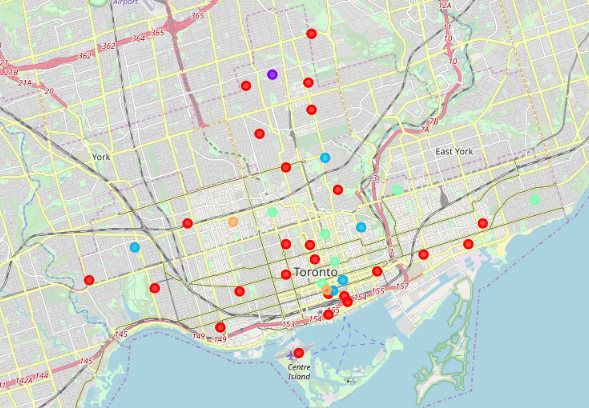

In [78]:

Clusters = toronto_merged
Clusters = Clusters.drop({'index','Neighbourhood','Postal Code', 'Latitude','Longitude'}, 1)




Looking at the 5 Clusters

In [79]:
# Cluster 1 (with label 0) , which is also the biggest cluster
Clusters.loc[Clusters['Cluster Labels'] == 0]

,Postcode,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M4L,East Toronto,0,Italian Restaurant,Ice Cream Shop,Zoo,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
3,M4M,East Toronto,0,Greek Restaurant,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
4,M4N,Central Toronto,0,Donut Shop,Zoo,Field,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Electronics Store
5,M4P,Central Toronto,0,Other Great Outdoors,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Food Court
7,M4S,Central Toronto,0,Café,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Zoo,Food Court
9,M4V,Central Toronto,0,Sushi Restaurant,Indian Restaurant,Liquor Store,Pizza Place,Egyptian Restaurant,Zoo,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant
10,M4W,Downtown Toronto,0,Nail Salon,Zoo,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
13,M5A,Downtown Toronto,0,Ice Cream Shop,Zoo,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
16,M5E,Downtown Toronto,0,Grocery Store,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
17,M5G,Downtown Toronto,0,Fish & Chips Shop,Zoo,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant


In [80]:
#Cluster 2
Clusters.loc[Clusters['Cluster Labels'] == 1]

,Postcode,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,M4R,Central Toronto,1,Pub,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Food Court


In [81]:
# Cluster 3
Clusters.loc[Clusters['Cluster Labels'] == 2]

,Postcode,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,M4T,Central Toronto,2,Park,Indian Restaurant,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
11,M4X,Downtown Toronto,2,Steakhouse,Park,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
15,M5C,Downtown Toronto,2,Park,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Zoo,Egyptian Restaurant
21,M5L,Downtown Toronto,2,Park,Concert Hall,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
34,M6P,West Toronto,2,Breakfast Spot,Park,Field,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Electronics Store


In [82]:
# Cluster 4
Clusters.loc[Clusters['Cluster Labels'] == 3]

,Postcode,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,3,Coffee Shop,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
1,M4K,East Toronto,3,Clothing Store,Coffee Shop,Zoo,Egyptian Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
12,M4Y,Downtown Toronto,3,Coffee Shop,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field,Egyptian Restaurant
14,M5B,Downtown Toronto,3,Beach,Coffee Shop,Zoo,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
18,M5H,Downtown Toronto,3,Pub,Middle Eastern Restaurant,Coffee Shop,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
24,M5R,Central Toronto,3,Scenic Lookout,Coffee Shop,Café,Zoo,Fast Food Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field


In [83]:
# Cluster 5
Clusters.loc[Clusters['Cluster Labels'] == 4]

,Postcode,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,M5X,Downtown Toronto,4,Snack Place,Bakery,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
30,M6G,Downtown Toronto,4,Bakery,Zoo,Field,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
